# 1准备数据

In [1]:
#在Jupyter中，使用matplotlib显示图像需要设置为 inline 模式，否则不会现实图像
%matplotlib inline
import matplotlib.pyplot as plt # 载入matplotlib
import numpy as np # 载入numpy
import tensorflow as tf # 载入Tensorflow
# https://numpy.org/doc/1.18/reference/random/generated/numpy.random.seed.html?highlight=seed
np.random.seed(5) # 设定随机种子

In [2]:
#直接采用np生成等差数列的方法，生成100个点，每个点的取值在-1~1之间
# https://numpy.org/doc/1.18/reference/generated/numpy.linspace.html
x_data = np.linspace(-1, 1, 100) 

In [3]:
# y = 2x +1 + 噪声， 其中，噪声的维度与x_data一致
# https://numpy.org/doc/1.18/reference/random/generated/numpy.random.randn.html?highlight=randn#numpy-random-randn
y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4  
y_data

array([-8.23509005e-01, -1.09194402e+00,  5.31165556e-02, -9.79624731e-01,
       -7.94539902e-01, -1.64987351e-01, -1.12126872e+00, -9.53826380e-01,
       -6.01726386e-01, -7.68311619e-01, -1.07306544e+00, -6.37506160e-01,
       -6.58683094e-01, -2.33358834e-01, -1.10025885e+00, -6.74011009e-01,
        1.07021050e-01,  4.29801090e-01, -8.77199096e-01,  2.56157720e-02,
       -5.84162346e-01, -4.94256413e-01, -4.59862784e-01, -2.39710242e-01,
        3.68272900e-01,  2.95069518e-01,  7.41627478e-02, -5.44152605e-02,
        1.32628668e-01,  1.29344995e-01,  5.29342540e-01, -1.03399392e-04,
        2.90451330e-01,  2.92906289e-01,  3.52814113e-01,  5.13828478e-01,
        5.33609491e-01,  1.02888892e+00,  5.00603293e-01,  1.20037049e+00,
        4.93820408e-01,  4.65473090e-01,  7.37264972e-01,  8.79549126e-01,
        8.85622740e-01,  1.33496717e+00,  1.31432305e+00,  1.09676606e+00,
        8.04859436e-01,  9.39552241e-01,  1.58556123e+00,  1.14910771e+00,
        5.76700848e-01,  

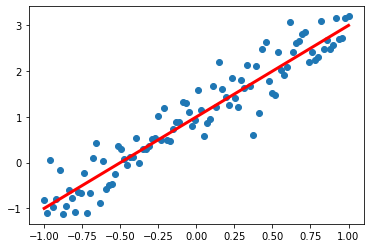

In [4]:
#画出随机生成数据的散点图
plt.scatter(x_data, y_data) 
# 画出我们想要学习到的线性函数 y = 2x +1
plt.plot (x_data, 2 * x_data + 1.0, color = 'red',linewidth=3) 

# 2 构建模型

In [5]:
# 定义训练数据的占位符，x是特征值，y是标签值
# https://tensorflow.google.cn/api_docs/python/tf/compat/v1/disable_eager_execution?hl=en
tf.compat.v1.disable_eager_execution()
# https://tensorflow.google.cn/api_docs/python/tf/compat/v1/placeholder?hl=en
x = tf.compat.v1.placeholder("float", name = "x") # tf.placeholder() is not compatible with eager execution.
y = tf.compat.v1.placeholder("float", name = "y")

In [6]:
def model(x, w, b):
    return tf.multiply(x, w) + b 

In [7]:
# 构建线性函数的斜率，变量w
w = tf.Variable(1.0, name="w0")
# 构建线性函数的截距，变量b
b = tf.Variable(0.0, name="b0")   
# pred是预测值，前向计算
pred = model(x, w, b) 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
# 迭代次数（训练轮数）
train_epochs = 10
# 学习率
learning_rate = 0.05 
# 控制显示loss值的粒度
display_step = 10

In [9]:
# 采用均方差作为损失函数
loss_function = tf.reduce_mean(tf.square(y-pred))  
# 梯度下降优化器
# https://tensorflow.google.cn/api_docs/python/tf/compat/v1/train/GradientDescentOptimizer?hl=en
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

In [10]:
sess = tf.compat.v1.Session()
init = tf.compat.v1.global_variables_initializer()
sess.run(init)

# 3 训练模型

Train Epoch: 01 Step: 010 loss= 0.007021904
Train Epoch: 01 Step: 020 loss= 0.186607897
Train Epoch: 01 Step: 030 loss= 0.024833022
Train Epoch: 01 Step: 040 loss= 0.620799541
Train Epoch: 01 Step: 050 loss= 0.006301077
Train Epoch: 01 Step: 060 loss= 0.023637433
Train Epoch: 01 Step: 070 loss= 0.354419798
Train Epoch: 01 Step: 080 loss= 0.027936857
Train Epoch: 01 Step: 090 loss= 0.029015331
Train Epoch: 01 Step: 100 loss= 0.106556907
Train Epoch: 02 Step: 110 loss= 0.179423183
Train Epoch: 02 Step: 120 loss= 0.067458346
Train Epoch: 02 Step: 130 loss= 0.000281519
Train Epoch: 02 Step: 140 loss= 0.344065875
Train Epoch: 02 Step: 150 loss= 0.021391280
Train Epoch: 02 Step: 160 loss= 0.006406436
Train Epoch: 02 Step: 170 loss= 0.142010629
Train Epoch: 02 Step: 180 loss= 0.000233675
Train Epoch: 02 Step: 190 loss= 0.094913408
Train Epoch: 02 Step: 200 loss= 0.052370854
Train Epoch: 03 Step: 210 loss= 0.044097763
Train Epoch: 03 Step: 220 loss= 0.082669340
Train Epoch: 03 Step: 230 loss= 

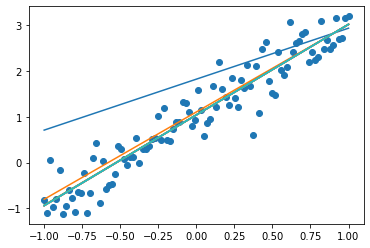

In [11]:
# 开始训练，轮数为 epoch，采用SGD随机梯度下降优化方法
step = 0   # 记录训练步数
loss_list = []   # 用于保存loss值的列表
for epoch in range(train_epochs):
    for xs,ys in zip(x_data, y_data):
        _, loss=sess.run([optimizer,loss_function], feed_dict={x: xs, y: ys}) 
         # 显示损失值 loss
        # display_step：控制报告的粒度
        # 例如，如果 display_step 设为 2 ，则将每训练2个样本输出一次损失值
        # 与超参数不同，修改 display_step 不会更改模型所学习的规律
        loss_list.append(loss)
        step=step+1
        if step % display_step == 0:
            print("Train Epoch:", '%02d' % (epoch+1), "Step: %03d" % (step),"loss=", \
                  "{:.9f}".format(loss))
                
    b0temp=b.eval(session=sess)
    w0temp=w.eval(session=sess)
    plt.plot (x_data, w0temp * x_data + b0temp  )# 画图
plt.scatter(x_data, y_data)

In [12]:
b0temp,w0temp

(1.0420128, 1.9822965)

# 4  进行预测

In [13]:
x_test = 1
predict = sess.run(pred, feed_dict={x: x_test})
print("预测值：%f" % predict)
target = 2 * x_test + 1.0
print("目标值：%f" % target)

预测值：3.024309
目标值：3.000000


# 5 TensorBoard可视化

In [14]:
logdir = './log'
#生成- - 个写日志的writer,并将当前的TensorFlow计算图写入日志。
# https://tensorflow.google.cn/api_docs/python/tf/compat/v1/summary/FileWriter?hl=en
writer = tf.compat.v1.summary.FileWriter(logdir, tf.compat.v1.get_default_graph())
writer.close()
